<a href="https://colab.research.google.com/github/MuggsyCodes/Colab_Google_Notebooks/blob/main/Data_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#********************** Data Shift Script ***********************#
# Program to TIME shift data imported from mp Analyzer program
#


import pandas as pd
# import txt file into data frame

file_p = r"vehicle_OASPL_test_data.txt"

# making data frame from TAB SEPARATED txt/csv file
data = pd.read_csv(file_p, sep='\t', index_col=None)
data

,X [s],Real [Pa],Real [g],Real [g].1,Real [g].2
0,0.00,0.00343,0.00539,0.00708,0.00590
1,0.32,0.01580,0.00877,0.02130,0.01370
2,0.64,0.00471,0.00537,0.00780,0.00630
3,0.96,0.00407,0.00544,0.00775,0.00657
4,1.28,0.03290,0.01790,0.04240,0.02540
...,...,...,...,...,...
778,249.00,0.05090,0.05310,0.09120,0.06710
779,249.00,0.04170,0.03610,0.07380,0.06170
780,250.00,0.03360,0.04940,0.07610,0.04560
781,250.00,0.03040,0.03120,0.05890,0.04200


Original Data: 


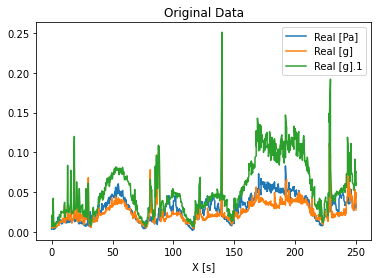

In [2]:
#matplotlib to plot original data

import matplotlib.pyplot as plt

df = data

# plot original data as a line graph
print("Original Data: ")

# supply a list of column names as the y variable
df.plot(x="X [s]", y=["Real [Pa]", "Real [g]", "Real [g].1"], kind="line", title="Original Data")

plt.show()

In [8]:
# calculate time between data points using integer location
a = data['X [s]'][0] #index by column and row
print(f"first slice:\n{a}")
b = data['X [s]'][1]
print(f"first slice:\n{b}")
delta = b-a
print(f"delta {delta}")

# calculate sampling frequency
sample_frequency = 1/delta
print(f"sampling frequency: {sample_frequency}")

# Calculate number shift points based on seconds 
# 1 sec = 3.125 shift points
# number shift points = shift seconds * 3.125

#!!! User input #!!!
user_input_seconds = int(input("How many seconds do you want to shift the data by?"))
# calculate shift points - use floor round
shift_points = round(user_input_seconds*3.125)
print(f"Shift points: {shift_points}")

first slice:
0.0
first slice:
0.32
delta 0.32
sampling frequency: 3.125
How many seconds do you want to shift the data by?12
Shift points: 38


In [9]:
# Now, to shift the data frame that has a phase lag
# i.e., the data of interest starts later than the 0 reference I want to match it to
# phase lag correction requires: 
#slicing = data[0:shift_points] #row index: col index

#no_time_slice = data.iloc[0:shift_points, 1:] #row index: col index using iloc

# 1. start with selecting all columns MINUS the TIME column
no_time_slice = data.iloc[0:, 1:] #row index: col index using iloc


#create new series from X [s] time axis
time_frame = data.iloc[0:,0]

#print(slicing)
# 2. Take slice, EXCLUDING TIME column, delete it and move the values after the slice UP to the 0 position 

print(f"Time axis:\n{time_frame}")
print(type(time_frame))


print(no_time_slice)
print(type(no_time_slice))



Time axis:
0        0.00
1        0.32
2        0.64
3        0.96
4        1.28
        ...  
778    249.00
779    249.00
780    250.00
781    250.00
782    250.00
Name: X [s], Length: 783, dtype: float64
<class 'pandas.core.series.Series'>
     Real [Pa]  Real [g]  Real [g].1  Real [g].2
0      0.00343   0.00539     0.00708     0.00590
1      0.01580   0.00877     0.02130     0.01370
2      0.00471   0.00537     0.00780     0.00630
3      0.00407   0.00544     0.00775     0.00657
4      0.03290   0.01790     0.04240     0.02540
..         ...       ...         ...         ...
778    0.05090   0.05310     0.09120     0.06710
779    0.04170   0.03610     0.07380     0.06170
780    0.03360   0.04940     0.07610     0.04560
781    0.03040   0.03120     0.05890     0.04200
782    0.03340   0.02770     0.06100     0.04560

[783 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [10]:
import pandas as pd

time_shift_df = time_frame.to_frame()
print(time_shift_df)
print(type(time_shift_df))

# shift all the columns of the LAGGING signal UP by the amount: time shift 
# set axis = 0 
new_df = no_time_slice.shift(-shift_points, axis = 0)
print(f"Shifted data:\n{new_df}")


      X [s]
0      0.00
1      0.32
2      0.64
3      0.96
4      1.28
..      ...
778  249.00
779  249.00
780  250.00
781  250.00
782  250.00

[783 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Shifted data:
     Real [Pa]  Real [g]  Real [g].1  Real [g].2
0       0.0119    0.0156      0.0257      0.0143
1       0.0115    0.0175      0.0275      0.0171
2       0.0121    0.0162      0.0255      0.0157
3       0.0180    0.0327      0.0837      0.0922
4       0.0148    0.0316      0.0367      0.0499
..         ...       ...         ...         ...
778        NaN       NaN         NaN         NaN
779        NaN       NaN         NaN         NaN
780        NaN       NaN         NaN         NaN
781        NaN       NaN         NaN         NaN
782        NaN       NaN         NaN         NaN

[783 rows x 4 columns]


In [11]:
# append the shifted data frame as a new column to the time axis data frame
shifted_df = time_shift_df.join(new_df)
print(shifted_df)

      X [s]  Real [Pa]  Real [g]  Real [g].1  Real [g].2
0      0.00     0.0119    0.0156      0.0257      0.0143
1      0.32     0.0115    0.0175      0.0275      0.0171
2      0.64     0.0121    0.0162      0.0255      0.0157
3      0.96     0.0180    0.0327      0.0837      0.0922
4      1.28     0.0148    0.0316      0.0367      0.0499
..      ...        ...       ...         ...         ...
778  249.00        NaN       NaN         NaN         NaN
779  249.00        NaN       NaN         NaN         NaN
780  250.00        NaN       NaN         NaN         NaN
781  250.00        NaN       NaN         NaN         NaN
782  250.00        NaN       NaN         NaN         NaN

[783 rows x 5 columns]


SHIFTED Data - NaN values at end are NOT plotted: 


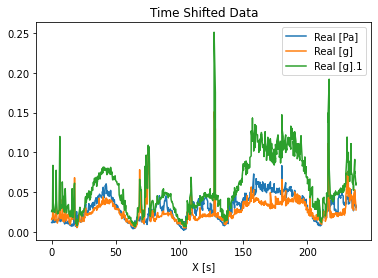

In [12]:
print("SHIFTED Data - NaN values at end are NOT plotted: ")

# supply a list of column names as the y variable
shifted_df.plot(x="X [s]", y=["Real [Pa]", "Real [g]", "Real [g].1"], kind="line", title="Time Shifted Data")

plt.show()